# ***NATURAL LANGUAGE PROCESSING USING RECURRENT NEURAL NETWORK(RNN)***

# ***The Cell Below is For Importing all the Librarires which we have used***

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

# ***Here we import the CSV file from our mounted drive to prepare it for training***

In [2]:
test_df=pd.read_csv('/content/drive/My Drive/IGNITION HACKS/training_data.csv')

In [3]:
test_df.head()

,ID,User,Text,Sentiment
0,864192,Carly_FTS,I *heart* filling up @dennisschaub desk 1 it...,1
1,523691,Open_Sourcing,"#SocioMat - people create prettier, younger an...",1
2,584154,xxcharlx,no way i dont want the tour to end,0
3,1527961,andreapuddu,@HemalRadia Hi Amazing Brother! Sending Limitl...,1
4,28609,umbec,@flockmaster they are chocolate,1


In [4]:
df_main=test_df[['Text','Sentiment']]
df_main

,Text,Sentiment
0,I *heart* filling up @dennisschaub desk 1 it...,1
1,"#SocioMat - people create prettier, younger an...",1
2,no way i dont want the tour to end,0
3,@HemalRadia Hi Amazing Brother! Sending Limitl...,1
4,@flockmaster they are chocolate,1
...,...,...
999995,@midderhonz i'm good.. off to buy an electric ...,1
999996,@StaceyPaha i know..for youngerr boys..what am...,1
999997,I can't belive it I just got asked for an auto...,1
999998,i am putting my bb in the fridge so it cant di...,0


# ***This is to fill NAN values if there are any just in case***

In [5]:
df_main.fillna(method='ffill',inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


# ***In the Cell Below We have defined Very Important Hyperparameters and we have used tokenizer on our training set to get numbered sequences instead of our text data so that we can train on it***

In [6]:
#Hyperparameter variables were made so that they could be tuned easily and conveniently
vocab_size = 100000
embedding_dim = 16
max_length = 64
trunc_type='post'
oov_tok = "<OOV>"#stands for out of vocabulary token
#We have fitted our tokenizer on our training set to acquire padded sequences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)#As it can only tokenize 100000 words(which is the defined vocabulary size) the tokenizer makes the tokens basd on frequncies giving the priority to the most frequent words
tokenizer.fit_on_texts(df_main['Text'])
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(df_main['Text'])
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

# ***This is the word index along with its token***

In [7]:
word_index

{'<OOV>': 1,
 'i': 2,
 'to': 3,
 'the': 4,
 'a': 5,
 'my': 6,
 'and': 7,
 'you': 8,
 'is': 9,
 'it': 10,
 'for': 11,
 'in': 12,
 'of': 13,
 'on': 14,
 'me': 15,
 'so': 16,
 'have': 17,
 'that': 18,
 'but': 19,
 "i'm": 20,
 'just': 21,
 'with': 22,
 'be': 23,
 'at': 24,
 'not': 25,
 'was': 26,
 'this': 27,
 'now': 28,
 'good': 29,
 'up': 30,
 'day': 31,
 'get': 32,
 'all': 33,
 'out': 34,
 'like': 35,
 'are': 36,
 'no': 37,
 'go': 38,
 'http': 39,
 'quot': 40,
 'do': 41,
 'today': 42,
 "it's": 43,
 'your': 44,
 'too': 45,
 'work': 46,
 'going': 47,
 'love': 48,
 'got': 49,
 'lol': 50,
 'time': 51,
 'back': 52,
 'from': 53,
 'u': 54,
 'one': 55,
 'what': 56,
 'com': 57,
 'will': 58,
 'im': 59,
 'we': 60,
 'know': 61,
 'about': 62,
 'am': 63,
 'really': 64,
 "don't": 65,
 'amp': 66,
 'had': 67,
 'can': 68,
 'see': 69,
 "can't": 70,
 'some': 71,
 'its': 72,
 'still': 73,
 'if': 74,
 '2': 75,
 'well': 76,
 'new': 77,
 'night': 78,
 'want': 79,
 'how': 80,
 'think': 81,
 'home': 82,
 'thanks

In [8]:
padded

array([[    0,     0,     0, ...,    91,     6,  1643],
       [    0,     0,     0, ..., 12046,    13,  3747],
       [    0,     0,     0, ...,   663,     3,   375],
       ...,
       [    0,     0,     0, ...,  5640,    25,    29],
       [    0,     0,     0, ...,    28,   104,   311],
       [    0,     0,     0, ...,   128,   691,    15]], dtype=int32)

# ***Here we split the data so that we can get a validation set of 10000 examples to keep track of overfitting and performance***

In [9]:
#splitting the training set to acquire a small validation set
X_train,X_val,Y_train,Y_val=train_test_split(padded,df_main['Sentiment'],test_size=0.01)

# ***In the cell below we have defined our model and compiled it.We have used 100 units of Long Short-Term Memory and have defined our loss as Binary_crossentropy because there are only 2 classes***

In [10]:
#To define our model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),#inputting our hyperparameters to create word embeddings 16 dimenstion
    tf.keras.layers.Bidirectional(LSTM(100,activation='relu')),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
#To compile our model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 64, 16)            1600000   
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               93600     
_________________________________________________________________
flatten (Flatten)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                3216      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 1,697,105
Trainable params: 1,697,105
Non-trainable params: 0
______________________________________________

## ***We imported ModelCheckpoint so that we can save our model after every epoch which is a safer option***

In [11]:
#This is a callback which saves the model after every epoch if the metric to be monitored (in this case accuracy) increases or decreases
checkpoint = ModelCheckpoint('/content/drive/My Drive/1st_best_model.hdf5', monitor='accuracy', verbose=1,
    save_best_only=True, mode='auto', period=1)

# ***Here we have used .fit to fit our model.We have used our checkpoint which we defined in the previous cell to save data after every epoch.We have instructed the checkpoint to monitor the accuracy and if there is increase in accuracy only then the model is saved***

In [12]:
num_epochs=5
history=model.fit(X_train, Y_train, epochs=num_epochs,callbacks=[checkpoint], validation_data=(X_val, Y_val))

Epoch 1/5
30938/30938 [==============================] - ETA: 0s - loss: 0.4288 - accuracy: 0.8064
Epoch 00001: accuracy improved from -inf to 0.80637, saving model to /content/drive/My Drive/1st_best_model.hdf5
30938/30938 [==============================] - 2117s 68ms/step - loss: 0.4288 - accuracy: 0.8064 - val_loss: 0.3912 - val_accuracy: 0.8182
Epoch 2/5
30938/30938 [==============================] - ETA: 0s - loss: 0.3582 - accuracy: 0.8411
Epoch 00002: accuracy improved from 0.80637 to 0.84109, saving model to /content/drive/My Drive/1st_best_model.hdf5
30938/30938 [==============================] - 2118s 68ms/step - loss: 0.3582 - accuracy: 0.8411 - val_loss: 0.3803 - val_accuracy: 0.8278
Epoch 3/5
30938/30938 [==============================] - ETA: 0s - loss: 0.3280 - accuracy: 0.8569
Epoch 00003: accuracy improved from 0.84109 to 0.85695, saving model to /content/drive/My Drive/1st_best_model.hdf5
30938/30938 [==============================] - 2118s 68ms/step - loss: 0.3280 - 

# ***In the cell below we have ploted 2 graphs one is to compare Training accuracy and Validation accuracy(expected to increase) the other one is to compare Training loss and Validation loss(expected to decrease)***

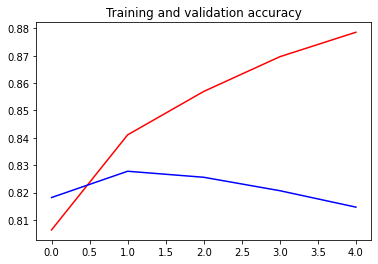

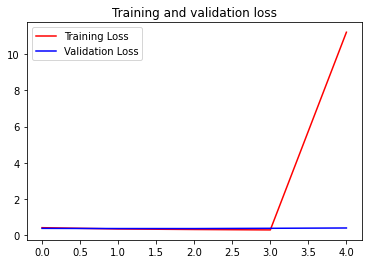

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# ***IMPORTING the judgement set for prediction***

In [15]:
path='/content/drive/My Drive/IGNITION HACKS/contestant_judgment.csv'#path has been defined which will be passed to the csv reading function
df_for_predictions=pd.read_csv(path)

# ***Padded Sequences have been made to make predictions***

In [16]:
judgment_sequences=tokenizer.texts_to_sequences(df_for_predictions['Text'])#just like the validation set we use our tokenizer to fit it on the given text to convert it to numbered sequences
judgment_padded=pad_sequences(judgment_sequences,maxlen=max_length)#numbered sequences are padded to make them of equal length

## ***Predictions made using.predict()***

In [18]:
predictions=model.predict(judgment_padded)

In [19]:
predictions[:100]

array([[0.17179134],
       [0.8612676 ],
       [0.48419213],
       [0.8160157 ],
       [0.78602827],
       [0.96425235],
       [0.9810326 ],
       [0.75012153],
       [0.01799947],
       [0.93543744],
       [0.9908697 ],
       [0.00146833],
       [0.13418883],
       [0.13927016],
       [0.609362  ],
       [0.10762435],
       [0.57018656],
       [0.9852928 ],
       [0.06716383],
       [0.13833377],
       [0.14539158],
       [0.07948461],
       [0.05873415],
       [0.8090038 ],
       [0.03173181],
       [0.00422448],
       [0.10556674],
       [0.03329986],
       [0.04260102],
       [0.88359046],
       [0.79665434],
       [0.66470736],
       [0.09297922],
       [0.9204079 ],
       [0.68715113],
       [0.911309  ],
       [0.267851  ],
       [0.7199857 ],
       [0.9799694 ],
       [0.17512393],
       [0.0555023 ],
       [0.9964073 ],
       [0.919142  ],
       [0.8060498 ],
       [0.94429123],
       [0.0043273 ],
       [0.7993486 ],
       [0.634

# ***Looping through prediction and classifying them into ones and zeros and appending them into an empty list***

In [20]:
emp_predictions=[]#empty list in which predictions will be appended
for var in predictions:
    if var>=0.5:
        var=1
        emp_predictions.append(var)
    else:
        var=0
        emp_predictions.append(var)

In [21]:
emp_predictions[:100]

[0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1]

# ***Looping and counting to be sure that all the predictions have been made***

In [22]:
count=0
for iter in emp_predictions:
    count=count+1
print(count)

599999


# ***Making a new column to append prediction rating into our judgement_csv file***

In [23]:
df_for_predictions['Prediction rating(ranging from 0 to 1)']=predictions

# ***Making a new column to append predictions into our judgement_csv file***

In [24]:
df_for_predictions['SENTIMENT']=emp_predictions

# ***Some printed out prediction in Dataframe format***

In [25]:
df_for_predictions[:100]

,ID,User,Text,Prediction rating(ranging from 0 to 1),SENTIMENT
0,599303,sauce_pot,I'm on my way to miss kacy's 4th bday party at...,0.171791,0
1,359673,lovelyritaz,@ripestapple I might not be the right person ...,0.861268,1
2,391095,Dannymassacur,@zomgkris I know it is.,0.484192,0
3,820049,Ms_Lady09,Mii ViSioN is BLuRRy...iM goiN to Bed!!NiTe Ni...,0.816016,1
4,658429,EvilSue,@tealou anyways - i did something good for som...,0.786028,1
...,...,...,...,...,...
95,422613,ruthisabel,just got home from work. it's my rest day toda...,0.247667,0
96,737149,CinaSmash,@drivenbyboredom babe I thought I would be bet...,0.240174,0
97,655606,FlorBorja,@Adrienne_Bailon Yes Adrienne today since the ...,0.945762,1
98,743134,PinguAndy,"Is going to church. Later on, shopping for for...",0.980076,1


# ***New file made for submission***

In [26]:
df_for_predictions.to_csv('/content/drive/My Drive/IGNITION HACKS/NEW_submission_contestant_judgment_predictions.csv')